In [1]:
import numpy as np
import pandas as pd
import jieba    #分词包
from sqlalchemy import create_engine

db_info = {'user':'root',
          'password':'',
           'host':'localhost',
           'database':'article_spider'
          }
engine = create_engine('mysql://%(user)s:%(password)s@%(host)s/%(database)s?charset=utf8' % db_info,encoding='utf-8')
sql = 'select * from jobbole_article;'
df = pd.read_sql(sql , con = engine)

In [2]:
#df.info()   # 查看信息
#df.isnull() # 判断数据是否缺失

In [3]:
df = df.loc[:,['create_date','title','tags']]
df = df.sort_values(by='create_date',ascending = False)

In [4]:
df['create_date'] = pd.to_datetime(df['create_date']) #将数据类型转换为日期类型
df = df.set_index('create_date')  # 将dcreate_date设置为索引
df = df['2017']
tags = df['tags']
title = df['title']

In [6]:
# 首先使用np.array()函数把DataFrame转化为np.ndarray()，再利用tolist()函数把np.ndarray()转为list
tags_data = np.array(tags)#np.ndarray()
tags_list = tags_data.tolist()#list
tags_text = "".join(tags_list) # 拼接成text
tags_text = tags_text.replace(',','') #把逗号换为空
tags_text = tags_text.replace('/','') #把逗号换为空

In [7]:
jieba.add_word('C/C++')
segment = jieba.lcut(tags_text)
words_df = pd.DataFrame({'segment':segment})
words_df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.155 seconds.
Prefix dict has been built succesfully.


,segment
0,开发
1,BitmapsBloomFilterGuavaRedis
2,布隆
3,过滤器
4,其他


In [9]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数":np.size})
words_stat = words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,segment,计数
299,技术,439
65,IT,300
410,职场,130
321,数据库,82
285,开发,72


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

from wordcloud import WordCloud#词云包

#用词云进行显示
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

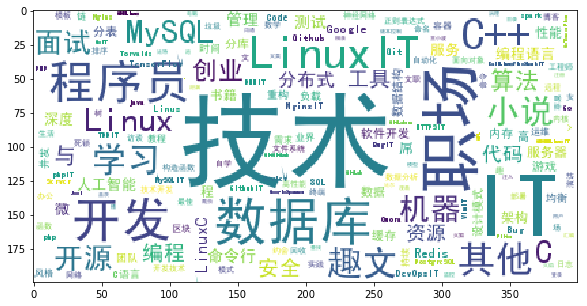